<a href="https://colab.research.google.com/github/CleanOOP/StudyAI/blob/main/_7_Embedding_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 임베딩을 통한 회귀와 분류 차이 확인

# 1. 데이터셋 로드

## 1.1 Dataset 클래스 주요 기능 요약

1. **데이터셋 로딩**
   - `glue/stsb` 데이터셋을 `datasets` 라이브러리로 불러오며, `train`, `validation` 데이터를 사용함.
   - `validation` 세트를 절반으로 나누어 `validation`과 `test`로 각각 750개씩 분할함.

2. **라벨 정규화**
   - STS-B의 유사도 점수는 `0~5` 범위로 구성됨.
   - cosine similarity 기반 학습을 위해 라벨을 **5로 나눠서 `0~1` 사이로 정규화**함

3. **InputExample로 변환**
   - 각 문장쌍과 정규화된 라벨을 `InputExample` 객체로 변환.
   - 이는 `sentence-transformers` 라이브러리에서 학습에 사용할 수 있는 입력 형식임.

4. **DataLoader 생성**
   - `train`, `validation`, `test` 중 원하는 split에 대해 `torch.utils.data.DataLoader`를 생성.
   - batch size 및 shuffle 여부를 설정 가능함.

In [ ]:
import os

os.environ["WANDB_DISABLED"] = "true"

In [ ]:
!pip install datasets numpy pandas scikit-learn matplotlib seaborn torch --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 94.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 63.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 66.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from datasets import load_dataset
from sentence_transformers import InputExample
from torch.utils.data import DataLoader

class Dataset:
    def __init__(self, dataset="glue", subset="stsb"):
        self.train = load_dataset(dataset, subset, split="train")
        full_val = load_dataset(dataset, subset, split="validation")
        indices = list(range(len(full_val)))
        even_indices = indices[::2]
        odd_indices = indices[1::2]
        self.validation = full_val.select(even_indices)
        self.test = full_val.select(odd_indices)

    @staticmethod
    def _normalize(score):
        return score/5.0

    def _convert_to_examples(self, dataset):
        return [
            InputExample(texts=[item['sentence1'], item['sentence2']], label=self._normalize(item['label']))
            for item in dataset
        ]

    def get_dataloader(self, split="train", batch_size=16, shuffle=True):
        dataset = getattr(self, split)
        examples = self._convert_to_examples(dataset)
        return DataLoader(examples, shuffle=shuffle, batch_size=batch_size)

dataset = Dataset()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/35.3k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/502k [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/151k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/114k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/5749 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1500 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1379 [00:00<?, ? examples/s]

## 1.2 데이터셋 분포도 확인

Dataset Distribution
Train : 5749 Validation : 750 Test : 750

Columns
Dataset({
    features: ['sentence1', 'sentence2', 'label', 'idx'],
    num_rows: 5749
})


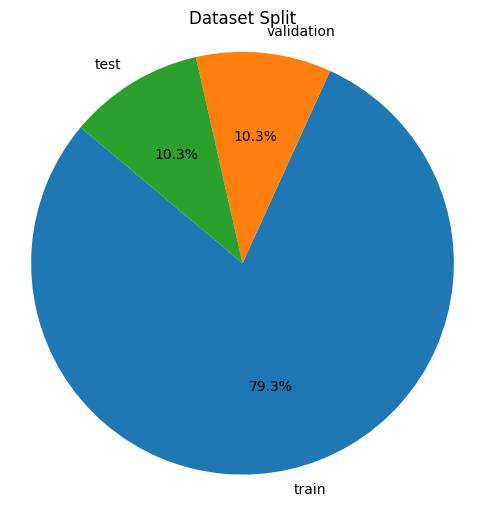

In [ ]:
import matplotlib.pyplot as plt
print("Dataset Distribution", end="\n")
print("Train :", len(dataset.train), "Validation :", len(dataset.validation), "Test :", len(dataset.test), end="\n\n")
print("Columns", end="\n")
print(dataset.train)

sizes = [len(dataset.train), len(dataset.validation), len(dataset.test)]
labels = ["train", "validation", "test"]

# 파이차트 그리기
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Dataset Split')
plt.axis('equal')  # 원형 유지
plt.show()

## 1.3 STS-B 점수 분포 해석 및 정규화 기준

- **4점 이상**인 문장 쌍을 보면, 두 문장이 **매우 유사(paraphrase)**함을 확인할 수 있습니다.
- 반면, **1점 이하**인 문장 쌍의 경우, 의미가 **반대(opposite)**라기보다는 **무관(unrelated)**한 경우가 많습니다.
- 즉, STS-B 점수는 **의미 유사도(Semantic Similarity)**를 측정하는 지표이지, 반대 의미를 별도로 처리하지는 않습니다.


### Loss 함수 선택 및 정규화

- 학습에는 `CosineSimilarityLoss`를 사용할 예정입니다.
- cosine similarity의 출력 범위는 `[-1, 1]`이지만, STS-B는 `0~5`의 유사도 점수를 가집니다.
- STS-B 점수에서 **0점은 무관함**을 의미할 뿐, cosine similarity에서 `-1`과 같은 **반대 의미**와는 다릅니다.
- 따라서 **정규화는 5로만 나누어 [0, 1] 범위로 변환하는 것이 더 적절**합니다.

$$
\text{Normalized Score} = \frac{\text{Original Score}}{5.0}
$$

이 방식은 의미 왜곡 없이 cosine similarity 예측과의 차이를 최소화할 수 있습니다.

In [ ]:
import pandas as pd
from IPython.display import display

train_data = pd.DataFrame(dataset.train)
print("label >= 4")
display(train_data[train_data['label']>= 4].head())

print("2<= label <= 3")
display(train_data[(2<= train_data['label']) & (3 >= train_data['label'])].head())

print("label <= 1")
display(train_data[train_data['label']<= 1].head())



label >= 4


,sentence1,sentence2,label,idx
0,A plane is taking off.,An air plane is taking off.,5.00,0
4,A man is playing the cello.,A man seated is playing the cello.,4.25,4
5,Some men are fighting.,Two men are fighting.,4.25,5
9,A person is throwing a cat on to the ceiling.,A person throws a cat on the ceiling.,5.00,9
10,The man hit the other man with a stick.,The man spanked the other man with a stick.,4.20,10


2<= label <= 3


,sentence1,sentence2,label,idx
3,Three men are playing chess.,Two men are playing chess.,2.6,3
8,A man is playing on a guitar and singing.,A woman is playing an acoustic guitar and sing...,2.2,8
21,A man is playing a guitar.,A girl is playing a guitar.,2.8,21
23,A woman is eating something.,A woman is eating meat.,3.0,23
32,A woman is dancing and singing with other women.,A woman is dancing and singing in the rain.,3.0,32


label <= 1


,sentence1,sentence2,label,idx
6,A man is smoking.,A man is skating.,0.5,6
17,A woman is writing.,A woman is swimming.,0.5,17
45,A man is playing the piano.,A woman is playing the violin.,1.0,45
46,A woman is playing the flute.,A man is playing the guitar.,1.0,46
68,A man is dancing.,A man is talking.,0.6,68


# 2. 모델

## 2.1 훈련 class 선언

1. **사전 학습 모델 불러오기**
   - 기본적으로 `sentence-transformers/all-MiniLM-L6-v2` 모델을 로드하여 문장을 임베딩 벡터로 변환함.
   - `SentenceTransformer`를 통해 다양한 pre-trained 모델 사용 가능.

2. **손실 함수 설정**
   - `cosine` (기본값): 임베딩 간 cosine similarity가 실제 유사도 점수와 가까워지도록 학습.
   - `mse`: 임베딩 벡터 간 유사도를 회귀 문제로 처리.
   - 사용자가 지정한 손실 함수에 따라 자동 설정됨.

3. **학습 함수 (`train`)**
   - 주어진 train DataLoader와 validation examples를 기반으로 모델을 학습.
   - 학습 중 주기적으로 evaluator를 사용하여 검증 성능 평가 (`evaluation_steps` 기준).
   - `fit()` 호출 시 epoch 수, warmup step, 출력 경로, 진행 표시 여부 등 설정 가능.

4. **평가 함수 (`evaluate`)**
   - 입력된 문장쌍 examples에 대해 cosine similarity 기반 평가 수행.
   - `EmbeddingSimilarityEvaluator`를 활용하여 Pearson/Spearman correlation을 계산함.

5. **모델 저장 (`save`)**
   - 학습된 모델을 지정된 경로에 저장.
   - 경로를 지정하지 않으면 기본 출력 경로(`output/stsb-regression-model`)에 저장됨.

In [ ]:
from sentence_transformers import SentenceTransformer, losses, evaluation
from torch.utils.data import DataLoader
from typing import Optional

class SentenceEmbeddingTrainer:
    def __init__(
        self,
        model_name: str = "sentence-transformers/all-MiniLM-L6-v2",
        loss_fn: Optional[str] = "cosine",
        output_path: Optional[str] = "output/stsb-regression-model"
    ):
        self.model = SentenceTransformer(model_name)
        self.output_path = output_path
        self.loss_fn = self._get_loss(loss_fn)

    def _get_loss(self, loss_type: str):
        if loss_type == "cosine":
            return losses.CosineSimilarityLoss(self.model)
        elif loss_type == "mse":
            return losses.MSELoss(self.model)
        else:
            raise ValueError(f"Unsupported loss type: {loss_type}")

    def train(
        self,
        train_dataloader: DataLoader,
        val_examples: Optional[list] = None,
        epochs: int = 3,
        warmup_steps: int = 100,
        evaluation_steps: int = 1000,
        show_progress_bar: bool = True
    ):
        evaluator = None
        if val_examples:
            evaluator = evaluation.EmbeddingSimilarityEvaluator.from_input_examples(
                val_examples, name='validation'
            )

        self.model.fit(
            train_objectives=[(train_dataloader, self.loss_fn)],
            evaluator=evaluator,
            epochs=epochs,
            warmup_steps=warmup_steps,
            evaluation_steps=evaluation_steps if evaluator else None,
            output_path=self.output_path,
            show_progress_bar=show_progress_bar
        )

    def evaluate(self, examples: list, name: str = "evaluation"):
        evaluator = evaluation.EmbeddingSimilarityEvaluator.from_input_examples(examples, name=name)
        return evaluator(self.model)

    def save(self, path: Optional[str] = None):
        path = path or self.output_path
        self.model.save(path)

embeddinig_trainer = SentenceEmbeddingTrainer()
print(embeddinig_trainer.model)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

SentenceTransformer(
  (0): Transformer({'max_seq_length': 256, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 384, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
  (2): Normalize()
)


In [ ]:
print(embeddinig_trainer.model._first_module().auto_model)

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 384, padding_idx=0)
    (position_embeddings): Embedding(512, 384)
    (token_type_embeddings): Embedding(2, 384)
    (LayerNorm): LayerNorm((384,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-5): 6 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=384, out_features=384, bias=True)
            (key): Linear(in_features=384, out_features=384, bias=True)
            (value): Linear(in_features=384, out_features=384, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=384, out_features=384, bias=True)
            (LayerNorm): LayerNorm((384,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)


In [ ]:
from collections import defaultdict

model = embeddinig_trainer.model._first_module().auto_model

def print_parameter_counts(model):

    module_param_count = defaultdict(int)

    for name, param in model.named_parameters():
        if param.requires_grad:
            # 상위 모듈 이름 (예: embeddings.word_embeddings -> embeddings)
            top_name = ".".join(name.split(".")[:2])
            module_param_count[top_name] += param.numel()

    total = 0
    print("[각 모듈별 파라미터 수]")
    for module_name, param_count in sorted(module_param_count.items()):
        print(f"{module_name:<30} : {param_count:,}")
        total += param_count
    print(f"\n총 파라미터 수: {total:,}")

print_parameter_counts(model)


[각 모듈별 파라미터 수]
embeddings.LayerNorm           : 768
embeddings.position_embeddings : 196,608
embeddings.token_type_embeddings : 768
embeddings.word_embeddings     : 11,720,448
encoder.layer                  : 10,646,784
pooler.dense                   : 147,840

총 파라미터 수: 22,713,216


# 2.2 훈련 이전 metric 계산

In [ ]:
train_dataloader = dataset.get_dataloader("train", batch_size=16, shuffle=True)

val_examples = dataset._convert_to_examples(dataset.validation)
test_examples = dataset._convert_to_examples(dataset.test)

embeddinig_trainer.evaluate(test_examples, name="test")

{'test_pearson_cosine': 0.8695090762833582,
 'test_spearman_cosine': 0.8696557067721404}

# 2.3 훈련 이후 metric 계산

In [ ]:
embeddinig_trainer.train(
    train_dataloader=train_dataloader,
    val_examples=val_examples,
    epochs=1,
    warmup_steps=100,
    evaluation_steps=500,
    show_progress_bar=True,
)

print("▶ Test 세트 평가 결과:")
embeddinig_trainer.evaluate(test_examples, name="test")

# embeddinig_trainer.save()

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Step,Training Loss,Validation Loss,Validation Pearson Cosine,Validation Spearman Cosine
360,No log,No log,0.892941,0.888101


▶ Test 세트 평가 결과:


{'test_pearson_cosine': 0.8951296953443633,
 'test_spearman_cosine': 0.8969352962274001}